#### Auteur: Irina Maslowski

### Projet N° 4. Segmentez des clients d'un site e-commerce

#### Données: [Brazilian E-Commerce Public Dataset by Olist. 100,000 Orders with product, customer and reviews info](https://www.kaggle.com/olistbr/brazilian-ecommerce)
années: 2016 - 2018

## Taches:
1. créer les meilleures features pour les exploiter à partir de données dans notre disposition
2. utiliserez des méthodes non supervisées pour regrouper ensemble des clients de profils similaires
**Cahier des charges** :
1. La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
2. Evaluez la fréquence à laquelle la segmentation doit être mise à jour, 
afin de pouvoir effectuer un devis de contrat de maintenance.
3. Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# EXEMPLE sur http://www.python-simple.com/python-statsmodels/statsmodels-anova.php
import statsmodels.formula.api
import statsmodels.api
import datetime as dt

## Sommaire:
* [Import des données](#first-bullet)
* [Analyse](#analysis)
* [Création d'un dataframe client](#client_df)
    * [Création d'une variable "purchase_frequency"](#purchase_frequency)
    * [Création d'une variable "average_consumer_basket"](#average_consumer_basket)
    * [Aplatissement de multi-index](#multiindex_inline)
    * [Simplification des catégories de produits](#product_categ)

# Import des données <a class="anchor" id="first-bullet"></a>

In [2]:
df_olist_ecommerce = pd.read_excel('C:/Users/piari/Documents/Projet4_ecommerce/df_olist_ecommerce.xlsx')

In [3]:
df_olist_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_category_name',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'contain_message', 'delta_date_order',
       'customer_seller_distance', 'customer_seller_distance_inferior50km',
       'customer_seller_distance_51km-100km',
       'customer_seller_distance_101km-1000km',
   

In [4]:
#del df_olist_ecommerce['Unnamed: 0']

# Analyse <a class="anchor" id="analysis"></a>

In [5]:
var_discretes = ['payment_sequential', 'payment_installments', 'customer_seller_distance_51km-100km',
                'customer_seller_distance_inferior50km', 'customer_seller_distance_101km-1000km', 'customer_seller_distance_1001km_plus',
                'delivered', 'in_progress', 'unavailable', 'canceled']

'payment_sequential'

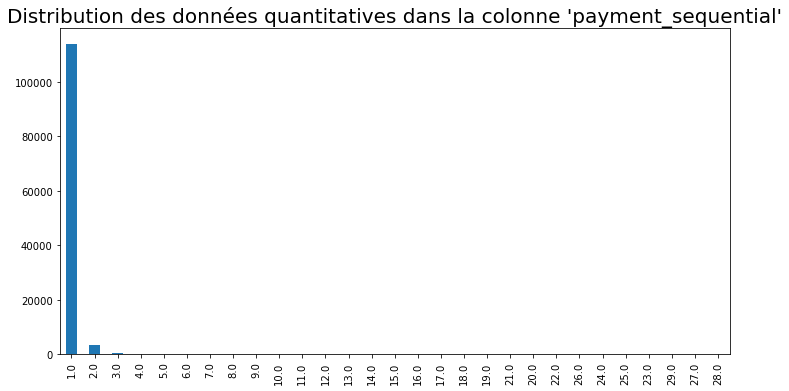

'payment_installments'

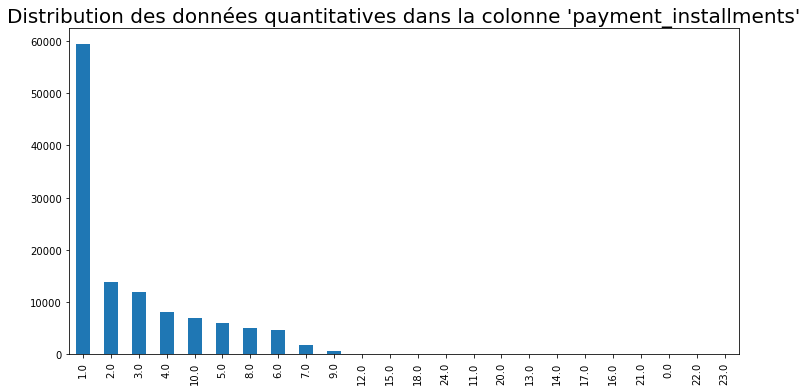

'customer_seller_distance_51km-100km'

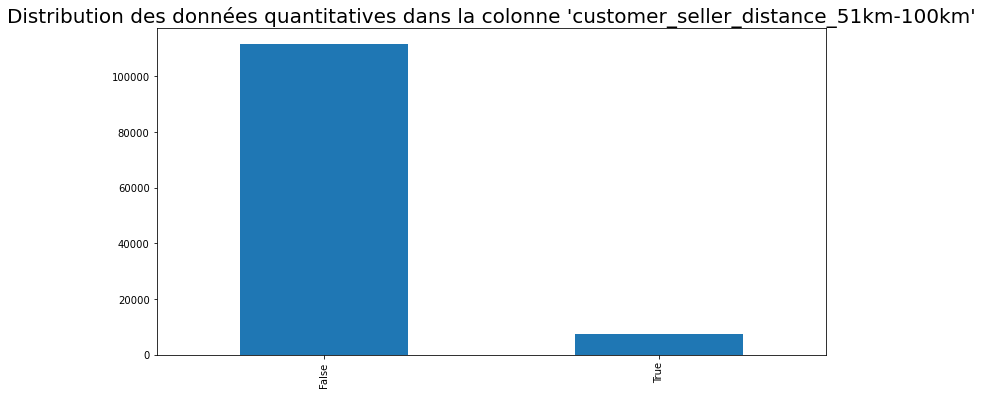

'customer_seller_distance_inferior50km'

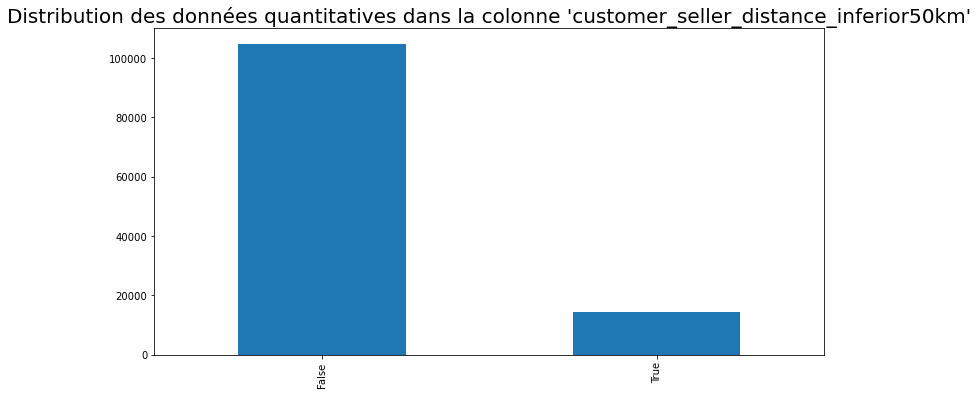

'customer_seller_distance_101km-1000km'

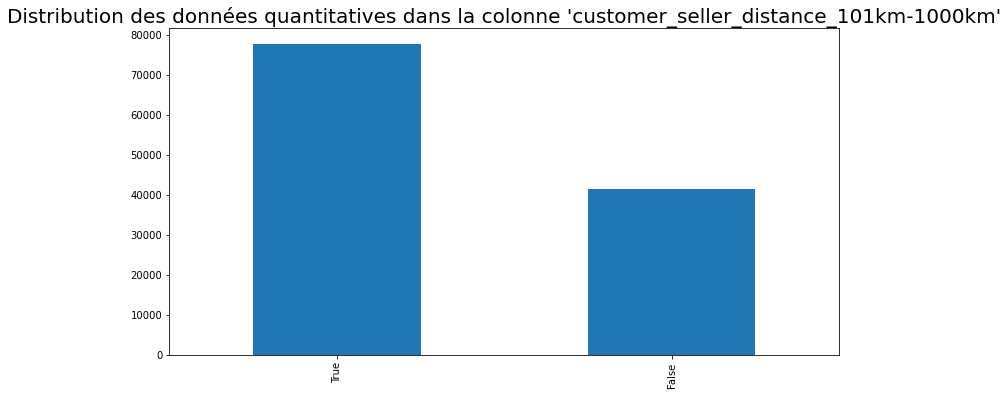

'customer_seller_distance_1001km_plus'

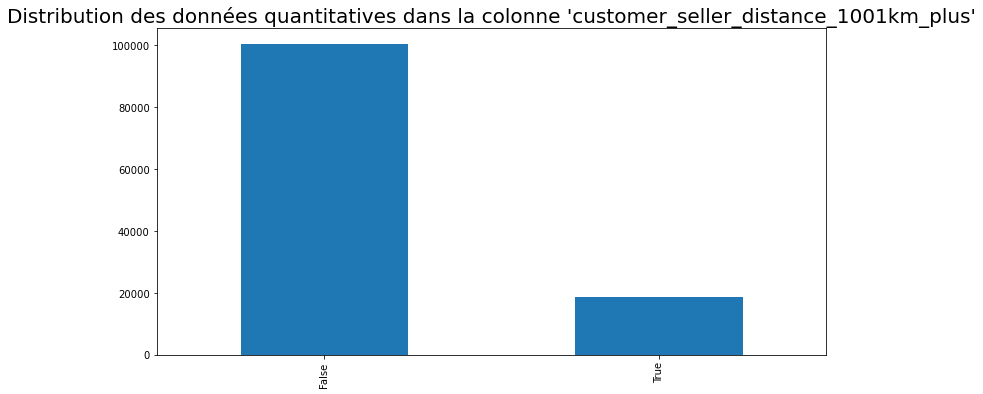

'delivered'

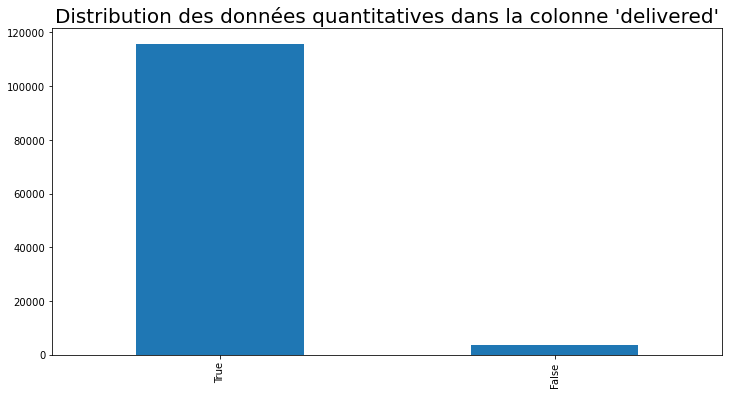

'in_progress'

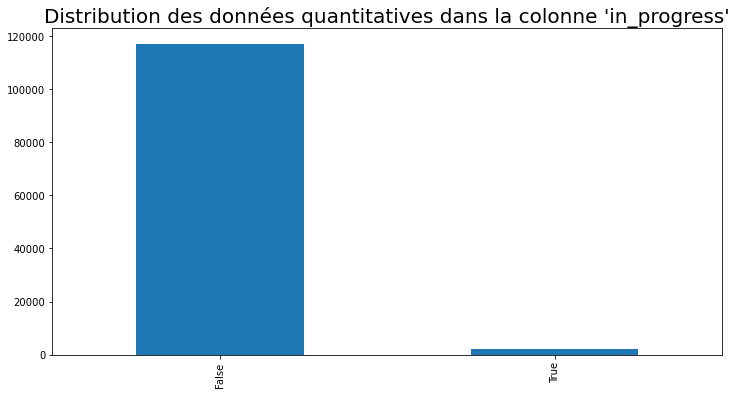

'unavailable'

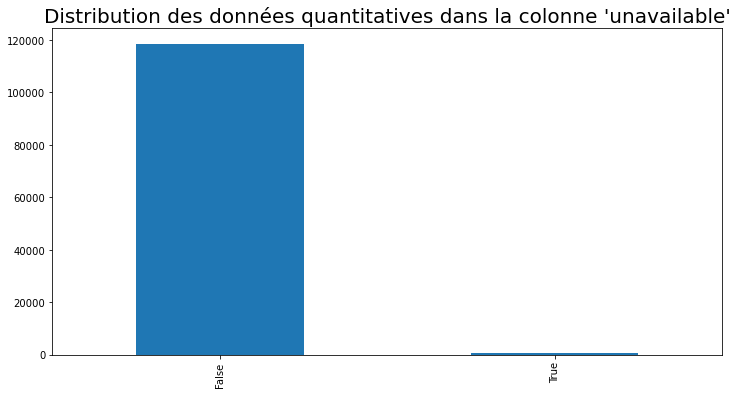

'canceled'

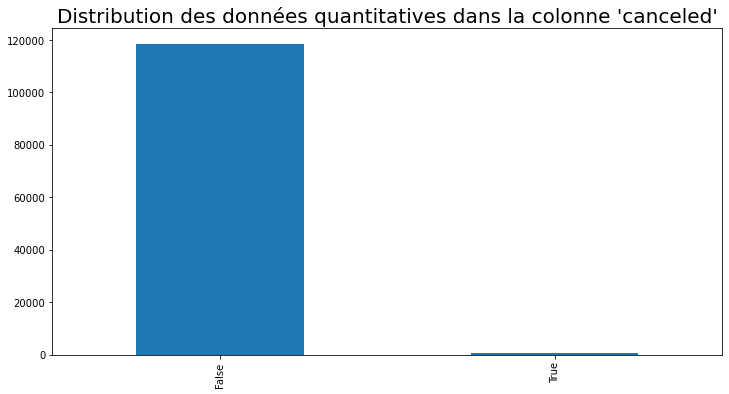

In [6]:
for cat in var_discretes:
    display(cat)
    df_olist_ecommerce[cat].value_counts(normalize=False).plot(kind='bar', figsize=(12,6))
    plt.title(f"Distribution des données quantitatives dans la colonne '{cat}'", fontsize = 20)
    plt.show()

In [7]:
df_olist_ecommerce['payment_sequential'].unique()

array([ 1.,  3.,  2.,  4.,  8.,  5.,  7.,  9.,  6., 14., 17., 22., 11.,
       16., 13., 18., 12., 19., 21., 20., 10., 15., 27., 25., 29., 28.,
       26., 23., 24., nan])

In [8]:
df_olist_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_category_name',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'contain_message', 'delta_date_order',
       'customer_seller_distance', 'customer_seller_distance_inferior50km',
       'customer_seller_distance_51km-100km',
       'customer_seller_distance_101km-1000km',
   

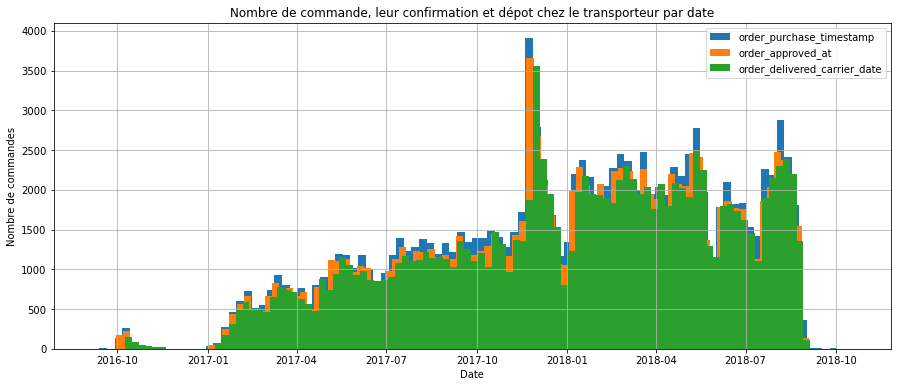

In [9]:
plt.figure()
df_olist_ecommerce['order_purchase_timestamp'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
df_olist_ecommerce['order_approved_at'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
df_olist_ecommerce['order_delivered_carrier_date'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
plt.title("Nombre de commande, leur confirmation et dépot chez le transporteur par date")
plt.legend(['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date'])
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.show()

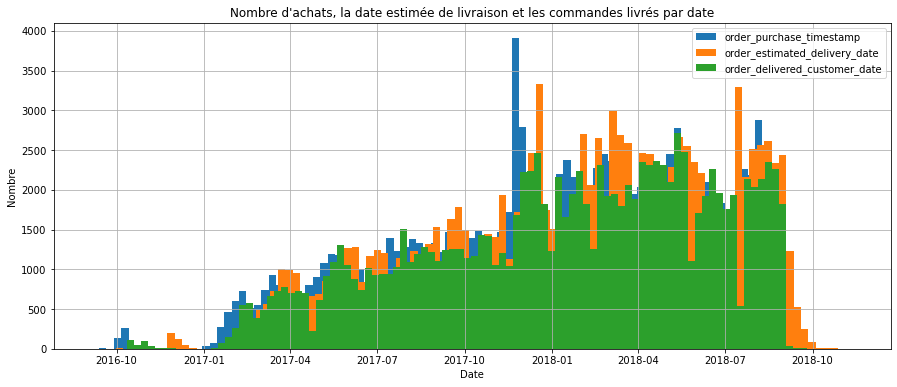

In [10]:
plt.figure()
df_olist_ecommerce['order_purchase_timestamp'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
df_olist_ecommerce['order_estimated_delivery_date'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
df_olist_ecommerce['order_delivered_customer_date'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
plt.title("Nombre d'achats, la date estimée de livraison et les commandes livrés par date")
plt.legend(['order_purchase_timestamp','order_estimated_delivery_date', 'order_delivered_customer_date'])
plt.xlabel("Date")
plt.ylabel("Nombre")
plt.show()

In [11]:
df_olist_ecommerce['shipping_limit_date']

0        2017-10-06 11:07:15
1        2017-10-06 11:07:15
2        2017-10-06 11:07:15
3        2018-07-30 03:24:27
4        2018-08-13 08:55:23
                 ...        
119146   2018-02-12 13:10:37
119147   2017-09-05 15:04:16
119148   2018-01-12 21:36:21
119149   2018-01-12 21:36:21
119150   2018-03-15 10:55:42
Name: shipping_limit_date, Length: 119151, dtype: datetime64[ns]

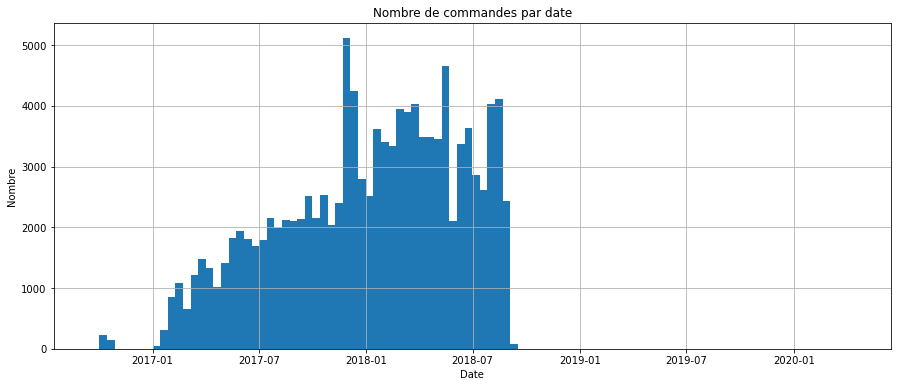

In [12]:
plt.figure()
# df_olist_ecommerce['order_delivered_carrier_date'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
df_olist_ecommerce['shipping_limit_date'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
# df_olist_ecommerce['order_delivered_customer_date'].hist(bins=100, density=False, cumulative=False, figsize=(15,6))
plt.title("Nombre de commandes par date")
# plt.legend(['order_delivered_carrier_date','shipping_limit_date', 'order_delivered_customer_date'])
plt.xlabel("Date")
plt.ylabel("Nombre")
plt.show()

In [13]:
df_olist_ecommerce[df_olist_ecommerce['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7'][['product_id', 'price', 'payment_value', 'freight_value', 'payment_installments']]

,product_id,price,payment_value,freight_value,payment_installments
0,87285b34884572647811a353c7ac498a,29.99,18.12,8.72,1.0
1,87285b34884572647811a353c7ac498a,29.99,2.00,8.72,1.0
2,87285b34884572647811a353c7ac498a,29.99,18.59,8.72,1.0


In [14]:
# This function tests the null hypothesis that a sample comes from a normal distribution.
#scipy.stats.normaltest(a, axis=0, nan_policy='propagate')
def _normaltest(col):
    k2, p = st.normaltest(df_olist_ecommerce[col], nan_policy='omit')
#     _values = df[col].sample(500).dropna()
    #_values = _values - _values.mean()
#     k2, p = st.normaltest(_values, nan_policy='omit')
    print(k2)
    alpha = 1e-3
    print(f"p = {p:g}")
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"Test de distribution normale pour {col} : L'hypothèse nulle peut être rejetée")
    else:
        print(f"Test de distribution normale pour {col} : L'hypothèse nulle ne peut pas être rejetée")

In [15]:
df_olist_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_category_name',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'contain_message', 'delta_date_order',
       'customer_seller_distance', 'customer_seller_distance_inferior50km',
       'customer_seller_distance_51km-100km',
       'customer_seller_distance_101km-1000km',
   

'price'

count    118318.000000
mean        120.649109
std         184.107686
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

mod:
 0    59.9
dtype: float64
var:
 33895.353692527155
ect:
 184.1069083237431
skw:
 7.8923210671402195
kur:
 119.1516774753837


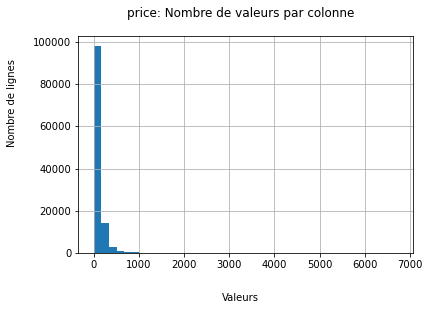

163228.9382623206
p = 0
Test de distribution normale pour price : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'freight_value'

count    118318.000000
mean         20.032587
std          15.836559
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64

mod:
 0    15.1
dtype: float64
var:
 250.7944761716663
ect:
 15.836491914930727
skw:
 5.54331296655175
kur:
 57.63546808131379


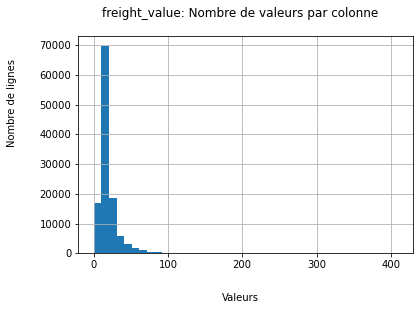

130442.86483838514
p = 0
Test de distribution normale pour freight_value : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'payment_value'

count    119148.000000
mean        172.735670
std         267.770023
min           0.000000
25%          60.850000
50%         108.160000
75%         189.240000
max       13664.080000
Name: payment_value, dtype: float64

mod:
 0    50.0
dtype: float64
var:
 71700.18334787354
ect:
 267.76889914228934
skw:
 13.966007883685831
kur:
 500.37482327243765


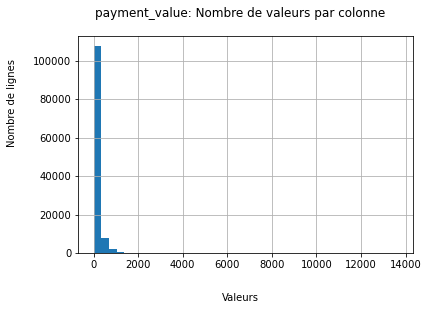

224311.59022886137
p = 0
Test de distribution normale pour payment_value : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'delta_date_order'

count    119151.000000
mean        291.957353
std         153.691653
min           0.000000
25%         167.179896
50%         273.229931
75%         401.885093
max         772.843738
Name: delta_date_order, dtype: float64

mod:
 0    434.877627
dtype: float64
var:
 23620.925999356547
ect:
 153.69100819292112
skw:
 0.4221170534118244
kur:
 -0.6782696745472956


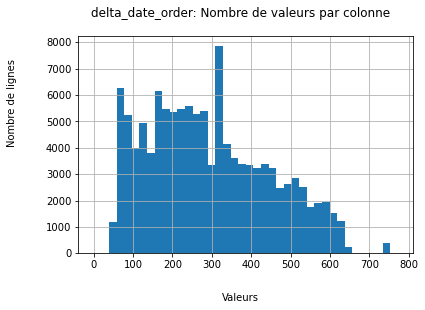

8936.700098221072
p = 0
Test de distribution normale pour delta_date_order : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'customer_seller_distance'

count    118318.000000
mean        598.179773
std         590.295692
min           0.000000
25%         188.423272
50%         433.347832
75%         794.485352
max        8677.898938
Name: customer_seller_distance, dtype: float64

mod:
 0    381.304736
dtype: float64
var:
 348446.0592727601
ect:
 590.2931977185237
skw:
 1.735233908269983
kur:
 3.6285903125925802


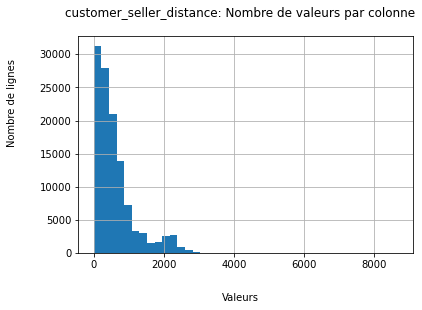

39446.43564075979
p = 0
Test de distribution normale pour customer_seller_distance : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'delivery_period'

count    115730.000000
mean         12.488512
std           9.448949
min           0.533414
25%           6.753553
50%          10.202471
75%          15.558070
max         209.628611
Name: delivery_period, dtype: float64

mod:
 0    5.680405
dtype: float64
var:
 89.28187387437156
ect:
 9.448908607578526
skw:
 3.851256024928672
kur:
 39.99896512957111


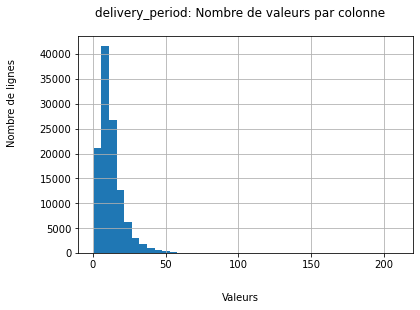

101295.91011643645
p = 0
Test de distribution normale pour delivery_period : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'intime_delivery'

count    115730.000000
mean         11.352153
std          10.166330
min        -188.975081
25%           6.507940
50%          12.056476
75%          16.315833
max         146.016123
Name: intime_delivery, dtype: float64

mod:
 0    15.467847
dtype: float64
var:
 103.35336911623968
ect:
 10.166285905690419
skw:
 -1.931008838681124
kur:
 28.21990162536408


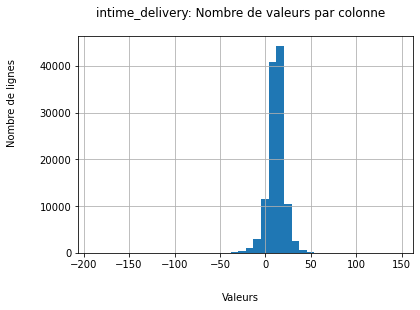

64775.538278203836
p = 0
Test de distribution normale pour intime_delivery : L'hypothèse nulle peut être rejetée
--------------------------------------------------


'product_volume_cm3'

count    118298.000000
mean          0.015378
std           0.023653
min           0.000168
25%           0.002856
50%           0.006600
75%           0.018502
max           0.296208
Name: product_volume_cm3, dtype: float64

mod:
 0    0.008
dtype: float64
var:
 0.0005594688711037645
ect:
 0.023653094324078708
skw:
 4.077817666318199
kur:
 25.5015005788415


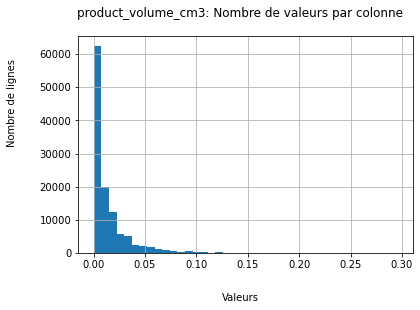

101791.88866303315
p = 0
Test de distribution normale pour product_volume_cm3 : L'hypothèse nulle peut être rejetée
--------------------------------------------------


In [16]:
vars_quantif = ['price', 'freight_value', 'payment_value', 'delta_date_order', 'customer_seller_distance',
               'delivery_period', 'intime_delivery', 'product_volume_cm3']

for c in vars_quantif:
    # set up figure & axes
    ds=df_olist_ecommerce[c].describe()
    display(c)
    display(ds)
    # La classe modale est la classe la plus fréquente. 
    print("mod:\n", df_olist_ecommerce[c].mode())
    # variance empirique corrigée
    print("var:\n",df_olist_ecommerce[c].var(ddof=0))
    # l'écart-type empirique corrigé
    print("ect:\n",df_olist_ecommerce[c].std(ddof=0))
    # l'asymétrie
    # skewness empirique
    # Si γ1=0 alors la distribution est symétrique.
    # Si γ1>0 alors la distribution est étalée à droite.
    # Si γ1<0 alors la distribution est étalée à gauche.
    print("skw:\n",df_olist_ecommerce[c].skew())
    # kurtosis empirique : une mesure d'aplatissement
    # Si γ2=0, alors la distribution a le même aplatissement que la distribution normale.
    # Si γ2>0, alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
    # Si γ2<0, alors les observations sont moins concentrées : la distribution est plus aplatie.
    print("kur:\n",df_olist_ecommerce[c].kurtosis())
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
    df_olist_ecommerce[c].hist(bins=40, density=False, cumulative=False)
    # set title and axis labels
    plt.suptitle(f'{c}: Nombre de valeurs par colonne')
    fig.text(0.5, -0.04, 'Valeurs', ha='center')
    fig.text(-0.04, 0.5, 'Nombre de lignes', rotation='vertical')
    plt.show()
    _normaltest(c)
    print('-'*50)

In [17]:
df_olist_ecommerce[df_olist_ecommerce['customer_unique_id'] == '0000366f3b9a7992bf8c76cfdf3221e2']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_seller_distance_51km-100km,customer_seller_distance_101km-1000km,customer_seller_distance_1001km_plus,delivery_period,delivered,in_progress,unavailable,canceled,product_volume_cm3,intime_delivery
63200,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21,0000366f3b9a7992bf8c76cfdf3221e2,7787,...,False,True,False,6.411227,True,False,False,False,0.007616,4.132905


In [18]:
df_olist_ecommerce_sorted = df_olist_ecommerce.sort_values(by=['order_purchase_timestamp'])

In [19]:
df_olist_ecommerce_sorted.groupby('order_id').agg({'product_id':'count'})

,product_id
order_id,
00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...
fffc94f6ce00a00581880bf54a75a037,1
fffcd46ef2263f404302a634eb57f7eb,1
fffce4705a9662cd70adb13d4a31832d,1


In [20]:
df_olist_ecommerce_sorted.isna().sum()

order_id                                    0
customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                         177
order_delivered_carrier_date             2086
order_delivered_customer_date            3421
order_estimated_delivery_date               0
customer_unique_id                          0
customer_zip_code_prefix                    0
customer_city                               0
customer_state                              0
order_item_id                             833
product_id                                833
seller_id                                 833
shipping_limit_date                       833
price                                     833
freight_value                             833
seller_zip_code_prefix                    833
seller_city                               833
seller_state                              833
product_name_lenght               

In [21]:
np.NaN

nan

In [22]:
def most_frequent(x):
#     try:
#         return x.value_counts().index[0]
#     except:
#         print(x)
#     return
    _counts = x.value_counts()
    if len(_counts): 
        return _counts.index[0]
    return np.NaN

df_olist_ecommerce_sorted.groupby('customer_unique_id').agg({
    "contain_message": (most_frequent, 'count'),
})

contain_message      
                                   most_frequent count
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2            True     1
0000b849f77a49e4a4ce2b2a4ca5be3f           False     1
0000f46a3911fa3c0805444483337064           False     1
0000f6ccb0745a6a4b88665a16c9f078            True     1
0004aac84e0df4da2b147fca70cf8255           False     1
...                                          ...   ...
fffcf5a5ff07b0908bd4e2dbc735a684           False     2
fffea47cd6d3cc0a88bd621562a9d061           False     1
ffff371b4d645b6ecea244b27531430a           False     1
ffff5962728ec6157033ef9805bacc48            True     1
ffffd2657e2aad2907e67c3e9daecbeb           False     1

[96096 rows x 2 columns]

In [23]:
df_olist_ecommerce_sorted.groupby('customer_unique_id').agg({
    "contain_message": (lambda x: x.value_counts().index[0], 'count'),
})

contain_message      
                                      <lambda_0> count
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2            True     1
0000b849f77a49e4a4ce2b2a4ca5be3f           False     1
0000f46a3911fa3c0805444483337064           False     1
0000f6ccb0745a6a4b88665a16c9f078            True     1
0004aac84e0df4da2b147fca70cf8255           False     1
...                                          ...   ...
fffcf5a5ff07b0908bd4e2dbc735a684           False     2
fffea47cd6d3cc0a88bd621562a9d061           False     1
ffff371b4d645b6ecea244b27531430a           False     1
ffff5962728ec6157033ef9805bacc48            True     1
ffffd2657e2aad2907e67c3e9daecbeb           False     1

[96096 rows x 2 columns]

In [24]:
df_olist_ecommerce_sorted.groupby('customer_unique_id').agg(
    mod = ('contain_message', lambda x: x.value_counts().index[0])
)

,mod
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,True
0000b849f77a49e4a4ce2b2a4ca5be3f,False
0000f46a3911fa3c0805444483337064,False
0000f6ccb0745a6a4b88665a16c9f078,True
0004aac84e0df4da2b147fca70cf8255,False
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,False
fffea47cd6d3cc0a88bd621562a9d061,False
ffff371b4d645b6ecea244b27531430a,False


# Création de dataframe client <a class="anchor" id="client_df"></a>

In [25]:
df_customer_unique = df_olist_ecommerce_sorted.groupby('customer_unique_id').agg({
    'order_id': ('count', 'nunique'),
    'order_purchase_timestamp': ('min', 'max'),
    'price': ('min', 'max', 'mean', 'sum'),
    'delta_date_order': ('first', 'last', most_frequent),
    'freight_value': ('min', 'max', 'mean', 'sum'),
    'contain_message': (most_frequent),
    'payment_type': (most_frequent),
    'product_category_name': (most_frequent),
    'payment_value': ('min', 'max', 'sum'),
    'product_id': ('count', 'nunique'),
    'review_score': ('min', 'mean'),
    'delivery_period': ('mean', 'max'),
    'delivered' : ('sum'),
    'in_progress' : ('sum'),
    'unavailable' : ('sum'),
    'canceled' : ('sum'),
    'product_volume_cm3' : ('max', most_frequent),
    'intime_delivery' : ('mean'),
    'payment_sequential' : ('min', 'mean', 'max'),
    'payment_installments' : ('mean'),
    'order_status' : (most_frequent),
    'customer_seller_distance' : ('mean')
})

In [26]:
df_customer_unique[['delivered', 'in_progress', 'unavailable', 'canceled']]

,delivered,in_progress,unavailable,canceled
,sum,sum,sum,sum
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,0,0,0
0000f46a3911fa3c0805444483337064,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,0,0,0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,0,0,0


In [27]:
df_customer_unique.shape

(96096, 40)

In [28]:
df_customer_unique.isna().sum()

order_id                  count               0
                          nunique             0
order_purchase_timestamp  min                 0
                          max                 0
price                     min               676
                          max               676
                          mean              676
                          sum                 0
delta_date_order          first               0
                          last                0
                          most_frequent       0
freight_value             min               676
                          max               676
                          mean              676
                          sum                 0
contain_message           most_frequent       0
payment_type              most_frequent       1
product_category_name     most_frequent     676
payment_value             min                 1
                          max                 1
                          sum           

In [29]:
df_customer_unique.describe()

order_id                       price                              \
              count       nunique           min           max          mean   
count  96096.000000  96096.000000  95420.000000  95420.000000  95420.000000   
mean       1.239916      1.034809    124.822897    128.423825    126.521711   
std        0.853318      0.214384    191.268866    193.850385    191.751617   
min        1.000000      1.000000      0.850000      0.850000      0.850000   
25%        1.000000      1.000000     39.990000     43.800000     42.900000   
50%        1.000000      1.000000     78.000000     79.900000     79.082500   
75%        1.000000      1.000000    139.000000    140.000000    139.900000   
max       75.000000     17.000000   6735.000000   6735.000000   6735.000000   

                    delta_date_order                              \
                sum            first          last most_frequent   
count  96096.000000     96096.000000  96096.000000  96096.000000   
mean     148.548964       290.924393    288.201370    289.551716   
std      249.382240       153.905384    153.416318    153.593165   
min        0.000000         0.000000      0.000000      0.000000   
25%       47.900000       166.285799    163.885744    165.182242   
50%       89.900000       272.164699    268.910440    270.878681   
75%      159.900000       400.901528    397.351398    399.154129   
max    13440.000000       772.843738    772.843738    772.843738   

      freight_value  ...   unavailable      canceled product_volume_cm3  \
                min  ...           sum           sum                max   
count  95420.000000  ...  96096.000000  96096.000000       95407.000000   
mean      19.960189  ...      0.006785      0.007805           0.015603   
std       15.824537  ...      0.095890      0.116675           0.023828   
min        0.000000  ...      0.000000      0.000000           0.000168   
25%       13.080000  ...      0.000000      0.000000           0.002873   
50%       16.240000  ...      0.000000      0.000000           0.006720   
75%       21.100000  ...      0.000000      0.000000           0.019200   
max      409.680000  ...     10.000000      9.000000           0.296208   

                    intime_delivery payment_sequential                \
      most_frequent            mean                min          mean   
count  95407.000000    93356.000000       96095.000000  96095.000000   
mean       0.015227       11.153206           1.000801      1.023112   
std        0.023450       10.144544           0.028296      0.191591   
min        0.000168     -188.975081           1.000000      1.000000   
25%        0.002816        6.392468           1.000000      1.000000   
50%        0.006400       11.755897           1.000000      1.000000   
75%        0.018375       16.229725           1.000000      1.000000   
max        0.296208      146.016123           2.000000     15.000000   

                    payment_installments customer_seller_distance  
                max                 mean                     mean  
count  96095.000000         96095.000000             95420.000000  
mean       1.046079             2.902393               603.896670  
std        0.383272             2.678879               596.552745  
min        1.000000             0.000000                 0.000000  
25%        1.000000             1.000000               190.697088  
50%        1.000000             2.000000               435.963281  
75%        1.000000             4.000000               801.743255  
max       29.000000            24.000000              8677.898938  

[8 rows x 34 columns]

In [30]:
df_customer_unique[df_customer_unique['payment_sequential']['min'].isna() == True]

order_id         order_purchase_timestamp  \
                                    count nunique                      min   
customer_unique_id                                                           
830d5b7aaa3b6f1e9ad63703bec97d23        3       1      2016-09-15 12:16:38   

                                                      price                \
                                                 max    min    max   mean   
customer_unique_id                                                          
830d5b7aaa3b6f1e9ad63703bec97d23 2016-09-15 12:16:38  44.99  44.99  44.99   

                                         delta_date_order              ...  \
                                     sum            first        last  ...   
customer_unique_id                                                     ...   
830d5b7aaa3b6f1e9ad63703bec97d23  134.97       762.217824  762.217824  ...   

                                 canceled product_volume_cm3                \
                                      sum                max most_frequent   
customer_unique_id                                                           
830d5b7aaa3b6f1e9ad63703bec97d23        0           0.004096      0.004096   

                                 intime_delivery payment_sequential           \
                                            mean                min mean max   
customer_unique_id                                                             
830d5b7aaa3b6f1e9ad63703bec97d23      -36.324745                NaN  NaN NaN   

                                 payment_installments  order_status  \
                                                 mean most_frequent   
customer_unique_id                                                    
830d5b7aaa3b6f1e9ad63703bec97d23                  NaN     delivered   

                                 customer_seller_distance  
                                                     mean  
customer_unique_id                                         
830d5b7aaa3b6f1e9ad63703bec97d23               566.014958  

[1 rows x 40 columns]

In [31]:
df_customer_unique[df_customer_unique['delta_date_order']['first'] != df_customer_unique['delta_date_order']['last']]['delta_date_order']

,first,last,most_frequent
customer_unique_id,,,
00172711b30d52eea8b313a7f2cced02,81.712836,65.344572,81.712836
004288347e5e88a27ded2bb23747066c,447.136979,276.412083,447.136979
004b45ec5c64187465168251cd1c9c2f,411.221470,143.907986,143.907986
0058f300f57d7b93c477a131a59b36c3,240.013009,208.972650,208.972650
00a39521eb40f7012db50455bf083460,146.886076,136.303715,136.303715
...,...,...,...
ff03923ad1eb9e32304deb7f9b2a45c9,176.819780,144.235370,144.235370
ff22e30958c13ffe219db7d711e8f564,54.019433,44.349549,54.019433
ff36be26206fffe1eb37afd54c70e18b,81.070035,55.202894,55.202894


## Création d'une variable "purchase_frequency" <a class="anchor" id="purchase_frequency"></a>

In [32]:
df_customer_unique['purchase_frequency'] = (df_customer_unique['delta_date_order']['first']-df_customer_unique['delta_date_order']['last'])/df_customer_unique['order_id']['nunique']

In [33]:
df_customer_unique['purchase_frequency'].unique()

array([ 0.        ,  8.18413194, 85.36244792, ...,  8.6223804 ,
       93.15155671, 68.02716821])

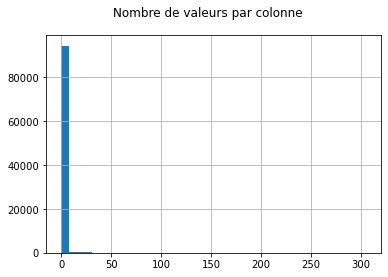

In [34]:
df_customer_unique['purchase_frequency'].hist(bins=40, density=False, cumulative=False)
plt.suptitle('Nombre de valeurs par colonne')
fig.text(0.5, -0.04, 'Valeurs', ha='center')
fig.text(-0.04, 0.5, 'Nombre de lignes', rotation='vertical')
plt.show()

<AxesSubplot:>

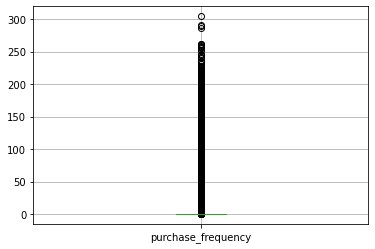

In [35]:
df_customer_unique.boxplot(column=['purchase_frequency'])

In [36]:
df_customer_unique

order_id         order_purchase_timestamp  \
                                    count nunique                      min   
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2        1       1      2018-05-10 10:56:27   
0000b849f77a49e4a4ce2b2a4ca5be3f        1       1      2018-05-07 11:11:27   
0000f46a3911fa3c0805444483337064        1       1      2017-03-10 21:05:03   
0000f6ccb0745a6a4b88665a16c9f078        1       1      2017-10-12 20:29:41   
0004aac84e0df4da2b147fca70cf8255        1       1      2017-11-14 19:45:42   
...                                   ...     ...                      ...   
fffcf5a5ff07b0908bd4e2dbc735a684        2       1      2017-06-08 21:00:36   
fffea47cd6d3cc0a88bd621562a9d061        1       1      2017-12-10 20:07:56   
ffff371b4d645b6ecea244b27531430a        1       1      2017-02-07 15:49:16   
ffff5962728ec6157033ef9805bacc48        1       1      2018-05-02 15:17:41   
ffffd2657e2aad2907e67c3e9daecbeb        1       1      2017-05-02 20:18:45   

                                                       price                  \
                                                 max     min     max    mean   
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27  129.90  129.90  129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27   18.90   18.90   18.90   
0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03   69.00   69.00   69.00   
0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41   25.99   25.99   25.99   
0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42  180.00  180.00  180.00   
...                                              ...     ...     ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36  680.00  890.00  785.00   
fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56   64.89   64.89   64.89   
ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16   89.90   89.90   89.90   
ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41  115.00  115.00  115.00   
ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45   56.99   56.99   56.99   

                                          delta_date_order              ...  \
                                      sum            first        last  ...   
customer_unique_id                                                      ...   
0000366f3b9a7992bf8c76cfdf3221e2   129.90       160.273507  160.273507  ...   
0000b849f77a49e4a4ce2b2a4ca5be3f    18.90       163.263090  163.263090  ...   
0000f46a3911fa3c0805444483337064    69.00       585.850868  585.850868  ...   
0000f6ccb0745a6a4b88665a16c9f078    25.99       369.875428  369.875428  ...   
0004aac84e0df4da2b147fca70cf8255   180.00       336.905972  336.905972  ...   
...                                   ...              ...         ...  ...   
fffcf5a5ff07b0908bd4e2dbc735a684  1570.00       495.853958  495.853958  ...   
fffea47cd6d3cc0a88bd621562a9d061    64.89       310.890532  310.890532  ...   
ffff371b4d645b6ecea244b27531430a    89.90       617.070162  617.070162  ...   
ffff5962728ec6157033ef9805bacc48   115.00       168.092095  168.092095  ...   
ffffd2657e2aad2907e67c3e9daecbeb    56.99       532.883021  532.883021  ...   

                                 product_volume_cm3                \
                                                max most_frequent   
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2           0.007616      0.007616   
0000b849f77a49e4a4ce2b2a4ca5be3f           0.005148      0.005148   
0000f46a3911fa3c0805444483337064           0.043750      0.043750   
0000f6ccb0745a6a4b88665a16c9f078           0.001045      0.001045   
0004aac84e0df4da2b147fca70cf8255           0.000528      0.000528   
...                                             ...           ...   
fffcf5a5ff07b0908bd4e2dbc735a684           0.251625      0.251625   
fffea47cd6d3cc0a88bd62

## Création d'une variable "average_consumer_basket" <a class="anchor" id="average_consumer_basket"></a>

In [37]:
# average_consumer_basket
df_customer_unique['average_consumer_basket'] = df_customer_unique['payment_value']['sum']/df_customer_unique['order_id']['nunique']

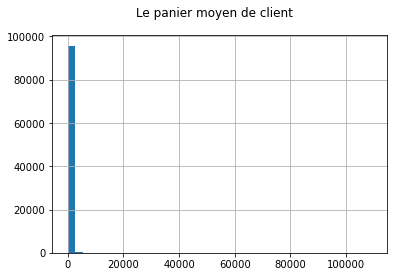

In [38]:
df_customer_unique['average_consumer_basket'].hist(bins=40, density=False, cumulative=False)
plt.suptitle('Le panier moyen de client')
fig.text(0.5, -0.04, 'Valeurs', ha='center')
fig.text(-0.04, 0.5, 'Nombre de lignes', rotation='vertical')
plt.show()

<AxesSubplot:>

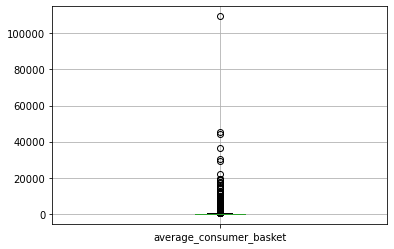

In [39]:
df_customer_unique.boxplot(column=['average_consumer_basket'])

In [40]:
df_customer_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   (order_id, count)                       96096 non-null  int64         
 1   (order_id, nunique)                     96096 non-null  int64         
 2   (order_purchase_timestamp, min)         96096 non-null  datetime64[ns]
 3   (order_purchase_timestamp, max)         96096 non-null  datetime64[ns]
 4   (price, min)                            95420 non-null  float64       
 5   (price, max)                            95420 non-null  float64       
 6   (price, mean)                           95420 non-null  float64       
 7   (price, sum)                            96096 non-null  float64       
 8   (delta_date_order, first)               96096 non-null  float64       
 9

In [41]:
df_customer_unique['product_id']

,count,nunique
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
0000f46a3911fa3c0805444483337064,1,1
0000f6ccb0745a6a4b88665a16c9f078,1,1
0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,2
fffea47cd6d3cc0a88bd621562a9d061,1,1
ffff371b4d645b6ecea244b27531430a,1,1


### Taux de disparition de clients

In [42]:
# taux de disparition de clients en 2 ans
len(df_customer_unique[df_customer_unique['delta_date_order']['last'] > 365].index)*100/len(df_customer_unique)

29.710914085914087

In [43]:
len(df_customer_unique)

96096

## Aplatissement de multi-index <a class="anchor" id="multiindex_inline"></a>

In [44]:
df_customer_unique.columns = ['_'.join(col).strip() for col in df_customer_unique.columns.values]

In [45]:
df_customer_unique

,order_id_count,order_id_nunique,order_purchase_timestamp_min,order_purchase_timestamp_max,price_min,price_max,price_mean,price_sum,delta_date_order_first,delta_date_order_last,...,product_volume_cm3_most_frequent,intime_delivery_mean,payment_sequential_min,payment_sequential_mean,payment_sequential_max,payment_installments_mean,order_status_most_frequent,customer_seller_distance_mean,purchase_frequency_,average_consumer_basket_
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1,2018-05-10 10:56:27,2018-05-10 10:56:27,129.90,129.90,129.90,129.90,160.273507,160.273507,...,0.007616,4.132905,1.0,1.0,1.0,8.0,delivered,110.563617,0.0,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,2018-05-07 11:11:27,2018-05-07 11:11:27,18.90,18.90,18.90,18.90,163.263090,163.263090,...,0.005148,4.248125,1.0,1.0,1.0,1.0,delivered,22.196745,0.0,27.19
0000f46a3911fa3c0805444483337064,1,1,2017-03-10 21:05:03,2017-03-10 21:05:03,69.00,69.00,69.00,69.00,585.850868,585.850868,...,0.043750,1.389734,1.0,1.0,1.0,8.0,delivered,517.142795,0.0,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,1,2017-10-12 20:29:41,2017-10-12 20:29:41,25.99,25.99,25.99,25.99,369.875428,369.875428,...,0.001045,11.108970,1.0,1.0,1.0,4.0,delivered,2481.780978,0.0,43.62
0004aac84e0df4da2b147fca70cf8255,1,1,2017-11-14 19:45:42,2017-11-14 19:45:42,180.00,180.00,180.00,180.00,336.905972,336.905972,...,0.000528,7.035463,1.0,1.0,1.0,6.0,delivered,154.488004,0.0,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,1,2017-06-08 21:00:36,2017-06-08 21:00:36,680.00,890.00,785.00,1570.00,495.853958,495.853958,...,0.251625,26.609722,1.0,1.0,1.0,10.0,delivered,1996.471764,0.0,4134.84
fffea47cd6d3cc0a88bd621562a9d061,1,1,2017-12-10 20:07:56,2017-12-10 20:07:56,64.89,64.89,64.89,64.89,310.890532,310.890532,...,0.032076,2.063657,1.0,1.0,1.0,1.0,delivered,1527.364045,0.0,84.58
ffff371b4d645b6ecea244b27531430a,1,1,2017-02-07 15:49:16,2017-02-07 15:49:16,89.90,89.90,89.90,89.90,617.070162,617.070162,...,0.003315,29.468704,1.0,1.0,1.0,1.0,delivered,1526.037981,0.0,112.46


In [46]:
df_customer_unique_clean = df_customer_unique.drop(['order_purchase_timestamp_min', 'order_purchase_timestamp_max'], axis=1)

In [47]:
df_customer_unique_clean.shape

(96096, 40)

In [48]:
df_customer_unique_clean.dropna(inplace = True)

In [49]:
df_customer_unique_clean.shape

(93342, 40)

## Simplification des catégories de produits <a class="anchor" id="product_categ"></a>

In [50]:
df_customer_unique_clean['product_category_name_most_frequent'].unique()

array(['bed_bath_table', 'health_beauty', 'stationery', 'telephony',
       'garden_tools', 'sports_leisure', 'fashion_bags_accessories',
       'luggage_accessories', 'computers_accessories',
       'fashion_underwear_beach', 'home_appliances', 'toys',
       'home_confort', 'housewares', 'small_appliances', 'watches_gifts',
       'furniture_living_room', 'electronics', 'office_furniture', 'auto',
       'furniture_decor', 'perfumery', 'construction_tools_construction',
       'drinks', 'books_general_interest', 'consoles_games', 'cool_stuff',
       'christmas_supplies', 'baby', 'pet_shop', 'other',
       'home_construction', 'home_appliances_2', 'fixed_telephony',
       'construction_tools_safety', 'fashion_shoes',
       'kitchen_dining_laundry_garden_furniture', 'art', 'food_drink',
       'food', 'books_technical', 'musical_instruments',
       'industry_commerce_and_business', 'audio',
       'construction_tools_lights', 'signaling_and_security',
       'market_place', 'fashi

In [51]:
PRODUCT_CATEG = {
    'health_beauty_perfumery': ('health_beauty', 'perfumery'),
    'telephony': ('telephony', 'fixed_telephony'),
    'sports_leisure_garden_party': ('sports_leisure', 'garden_tools', 'party_supplies', 'christmas_supplies'),
    'bags_luggage_accessories': ('fashion_bags_accessories', 'luggage_accessories'),
    'computers_accessories_consoles_games': ('computers_accessories', 'computers', 'pc_gamer', 'consoles_games', ),
    'fashion': ('fashion_underwear_beach', 'fashion_shoes', 'fashion_male_clothing', 'fashion_sport', 'fashio_female_clothing',
               'fashion_childrens_clothes'),
    'electronics_appliances': ('home_appliances', 'small_appliances', 'electronics', 'home_appliances_2',
                              'small_appliances_home_oven_and_coffee'),
    'home_confort': ('home_confort', 'home_comfort_2', 'bed_bath_table', 'housewares', 'air_conditioning'),
    'watches_gifts_stationery': ('watches_gifts', 'cool_stuff', 'stationery'),
    'auto': ('auto'),
    'furniture_decor': ('furniture_decor', 'furniture_living_room', 'office_furniture',
                        'kitchen_dining_laundry_garden_furniture', 'furniture_bedroom', 'furniture_mattress_and_upholstery',
                       'tablets_printing_image', ),
    'construction_tools': ('construction_tools_construction', 'home_construction', 'construction_tools_safety',
                          'construction_tools_lights', 'costruction_tools_garden', 'costruction_tools_tools', ),
    'food_drink': ('drinks', 'food_drink', 'food', ),
    'books': ('books_general_interest', 'books_technical', 'books_imported', ),
    'children_baby': ('baby', 'diapers_and_hygiene', 'toys'),
    'pet_shop': ('pet_shop', ),
    'other': 'other',
    'art': ('art', 'arts_and_craftmanship'),
    'agro_industry_commerce_and_business': ('industry_commerce_and_business', 'agro_industry_and_commerce'),
    'audio_music': ('audio', 'music', 'musical_instruments'),
    'security_and_services': ('signaling_and_security', 'security_and_services'),
    'market_place': 'market_place',
    'cine_photo': 'cine_photo',
    'flowers': ('flowers', ),
    'cds_dvds_blu_ray': ('dvds_blu_ray', 'cds_dvds_musicals'),
    'la_cuisine': ('la_cuisine', 'portable_kitchen_and_food_preparers') 
}

In [52]:
INV_CAT = dict()
for _k, _v in PRODUCT_CATEG.items():
    if isinstance(_v,str):
        INV_CAT[_v]=_k
    else:
        for _e in _v:
            INV_CAT[_e]=_k
INV_CAT

{'health_beauty': 'health_beauty_perfumery',
 'perfumery': 'health_beauty_perfumery',
 'telephony': 'telephony',
 'fixed_telephony': 'telephony',
 'sports_leisure': 'sports_leisure_garden_party',
 'garden_tools': 'sports_leisure_garden_party',
 'party_supplies': 'sports_leisure_garden_party',
 'christmas_supplies': 'sports_leisure_garden_party',
 'fashion_bags_accessories': 'bags_luggage_accessories',
 'luggage_accessories': 'bags_luggage_accessories',
 'computers_accessories': 'computers_accessories_consoles_games',
 'computers': 'computers_accessories_consoles_games',
 'pc_gamer': 'computers_accessories_consoles_games',
 'consoles_games': 'computers_accessories_consoles_games',
 'fashion_underwear_beach': 'fashion',
 'fashion_shoes': 'fashion',
 'fashion_male_clothing': 'fashion',
 'fashion_sport': 'fashion',
 'fashio_female_clothing': 'fashion',
 'fashion_childrens_clothes': 'fashion',
 'home_appliances': 'electronics_appliances',
 'small_appliances': 'electronics_appliances',
 'ele

In [53]:
df_tmp = df_customer_unique_clean.copy()
for _k, _v in INV_CAT.items():
    df_tmp.loc[df_tmp['product_category_name_most_frequent']==_k, 'product_category_name_most_frequent'] = _v
df_tmp['product_category_name_most_frequent']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2                home_confort
0000b849f77a49e4a4ce2b2a4ca5be3f     health_beauty_perfumery
0000f46a3911fa3c0805444483337064    watches_gifts_stationery
0000f6ccb0745a6a4b88665a16c9f078                   telephony
0004aac84e0df4da2b147fca70cf8255                   telephony
                                              ...           
fffcf5a5ff07b0908bd4e2dbc735a684     health_beauty_perfumery
fffea47cd6d3cc0a88bd621562a9d061               children_baby
ffff371b4d645b6ecea244b27531430a                        auto
ffff5962728ec6157033ef9805bacc48    watches_gifts_stationery
ffffd2657e2aad2907e67c3e9daecbeb     health_beauty_perfumery
Name: product_category_name_most_frequent, Length: 93342, dtype: object

In [54]:
df_customer_unique_clean['most_frequent_general_product_category_name'] = df_tmp['product_category_name_most_frequent']

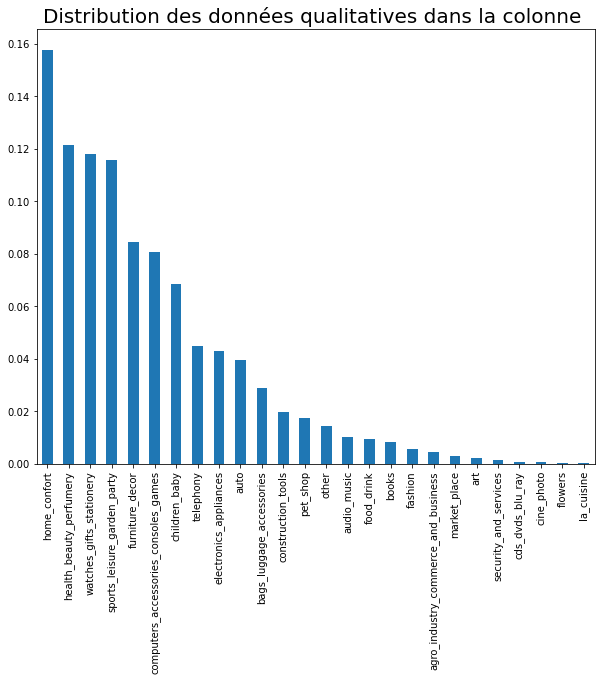

In [55]:
df_customer_unique_clean['most_frequent_general_product_category_name'].value_counts(normalize=True).plot(kind='bar', figsize=(10,8))
plt.title("Distribution des données qualitatives dans la colonne ", fontsize = 20)
plt.show()

In [56]:
df_customer_unique_clean.isna().sum()

order_id_count                                 0
order_id_nunique                               0
price_min                                      0
price_max                                      0
price_mean                                     0
price_sum                                      0
delta_date_order_first                         0
delta_date_order_last                          0
delta_date_order_most_frequent                 0
freight_value_min                              0
freight_value_max                              0
freight_value_mean                             0
freight_value_sum                              0
contain_message_most_frequent                  0
payment_type_most_frequent                     0
product_category_name_most_frequent            0
payment_value_min                              0
payment_value_max                              0
payment_value_sum                              0
product_id_count                               0
product_id_nunique  

In [57]:
df_customer_unique_clean = df_customer_unique_clean.drop(['order_id_count', 'price_max', 'price_min', 'price_mean',
                                                          'delta_date_order_most_frequent', 'freight_value_mean',
                                                          'freight_value_sum', 'product_id_count', 'payment_sequential_min',
                                                          'payment_sequential_max'], axis=1)

In [58]:
noms_colonnes = df_customer_unique_clean.columns

In [59]:
noms_colonnes

Index(['order_id_nunique', 'price_sum', 'delta_date_order_first',
       'delta_date_order_last', 'freight_value_min', 'freight_value_max',
       'contain_message_most_frequent', 'payment_type_most_frequent',
       'product_category_name_most_frequent', 'payment_value_min',
       'payment_value_max', 'payment_value_sum', 'product_id_nunique',
       'review_score_min', 'review_score_mean', 'delivery_period_mean',
       'delivery_period_max', 'delivered_sum', 'in_progress_sum',
       'unavailable_sum', 'canceled_sum', 'product_volume_cm3_max',
       'product_volume_cm3_most_frequent', 'intime_delivery_mean',
       'payment_sequential_mean', 'payment_installments_mean',
       'order_status_most_frequent', 'customer_seller_distance_mean',
       'purchase_frequency_', 'average_consumer_basket_',
       'most_frequent_general_product_category_name'],
      dtype='object')

In [60]:
df_customer_unique_clean[['delivered_sum', 'in_progress_sum',
       'unavailable_sum', 'canceled_sum']]

,delivered_sum,in_progress_sum,unavailable_sum,canceled_sum
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,0,0,0
0000f46a3911fa3c0805444483337064,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,0,0,0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,0,0,0
ffff371b4d645b6ecea244b27531430a,1,0,0,0


<AxesSubplot:>

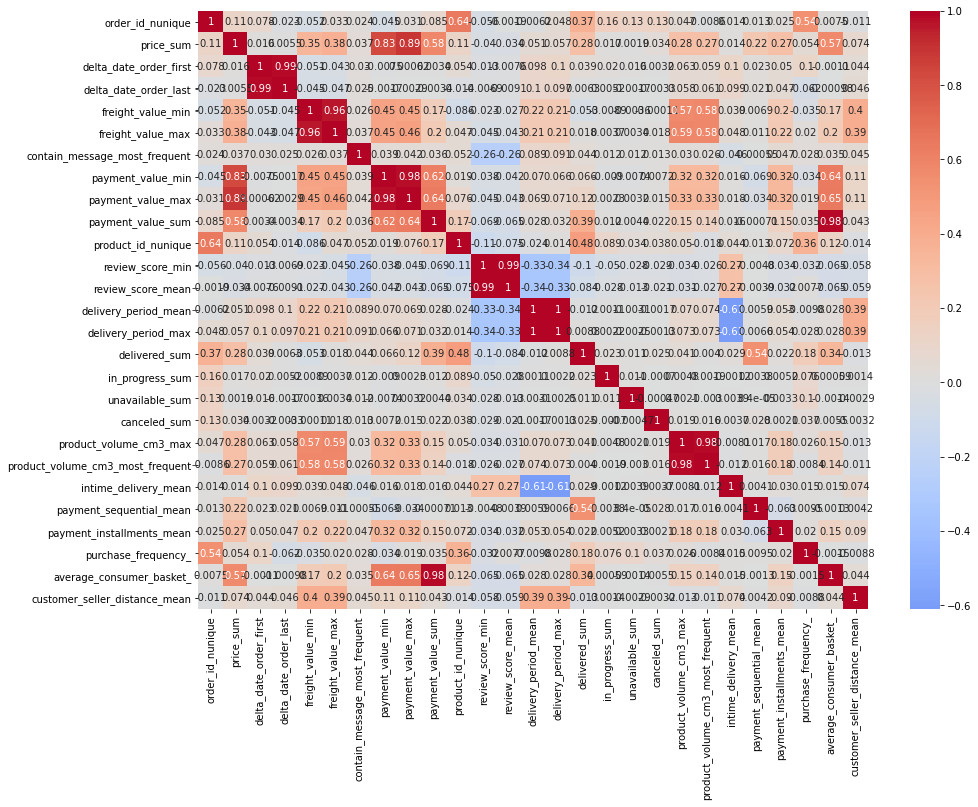

In [62]:
plt.subplots(figsize=(15,11))
sns.heatmap(df_customer_unique_clean[['order_id_nunique', 'price_sum', 'delta_date_order_first',
       'delta_date_order_last', 'freight_value_min', 'freight_value_max',
       'contain_message_most_frequent', 'payment_value_min',
       'payment_value_max', 'payment_value_sum', 'product_id_nunique',
       'review_score_min', 'review_score_mean', 'delivery_period_mean',
       'delivery_period_max', 'delivered_sum', 'in_progress_sum',
       'unavailable_sum', 'canceled_sum', 'product_volume_cm3_max',
       'product_volume_cm3_most_frequent', 'intime_delivery_mean',
       'payment_sequential_mean',
       'payment_installments_mean', 'purchase_frequency_',
       'average_consumer_basket_', 'customer_seller_distance_mean']].corr(), center = 0, cmap = "coolwarm", annot=True)

In [63]:
df_customer_unique_clean = df_customer_unique_clean.drop(['price_sum', 'product_id_nunique', 'payment_value_min',
                                                          'payment_value_max', 'payment_value_sum', 'freight_value_min',
                                                          'review_score_mean', 'delivery_period_mean',
                                                          'product_volume_cm3_max'], axis=1)

In [64]:
df_customer_unique_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93342 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   order_id_nunique                             93342 non-null  int64  
 1   delta_date_order_first                       93342 non-null  float64
 2   delta_date_order_last                        93342 non-null  float64
 3   freight_value_max                            93342 non-null  float64
 4   contain_message_most_frequent                93342 non-null  bool   
 5   payment_type_most_frequent                   93342 non-null  object 
 6   product_category_name_most_frequent          93342 non-null  object 
 7   review_score_min                             93342 non-null  int64  
 8   delivery_period_max                          93342 non-null  float64
 9   delivered_sum      

In [65]:
df_customer_unique_clean.to_excel("df_customer_unique.xlsx", index=False)

In [ ]:
# payement_value/comand_id